## Regression logistique pour MNIST

Le but de ce cahier est de familiariser le lecteur avec la régression SoftMax (une généralisation de la régression logistique à plus de deux catégories), les prédictions catégorielles et le jeu de données manuscrit MNIST. Le lecteur comprendra comment utiliser le logiciel de régression Scikit Logistic et visualiser les poids appris.

## Overview

### The MNIST dataset:

Le problème de classification MNIST, que nous avons vu dans notre premier TP, est l’un des problèmes classiques du ML pour l’apprentissage de la classification sur des données de grande dimension avec un nombre assez important d’exemples ($60000$). Yann LeCun et ses collaborateurs ont collecté et traité $700 000$ de chiffres manuscrits ($60000$ sont utilisés pour la formation et 10 000 pour les tests) afin de produire ce qui est devenu l'un des ensembles de données les plus largement utilisés dans ML: l"ensemble de données [MNIST](http://yann.lecun.com/exdb/mnist/). Chaque chiffre manuscrit est représenté dans une image carrée en niveaux de gris en forme de grille de pixels $28  x 28 $. Chaque pixel prend une valeur dans la plage $[0,255]$, ce qui représente 256 $ nuances de la couleur grise. Le problème de la classification des images trouve des applications dans un large éventail de domaines et est important pour de nombreuses applications pratiques.

### Regression SoftMax (multi-nomiale):
Nous allons utiliser la régression SoftMax, qui peut être considérée comme un modèle statistique qui attribue une probabilité qu'une image d'entrée donnée corresponde à l'un des 10 chiffres manuscrits. Le modèle est une généralisation de la régression logistique et se lit comme suit:
\begin{align}
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T}},
\end{align}
Ou $p(y=i|\boldsymbol{x};W)$ est la probabilité que $\boldsymbol{x}$ soit le $i$-th chiffre, $i\in[0,9]$.
Le modèle a également 10 vecteurs de poids $ \boldsymbol{w}_i $ que nous allons former ci-dessous. Enfin, on peut utiliser cette information pour la prédiction en prenant la valeur de $y$ pour laquelle cette probabilité est maximisée:
\begin{align}
y_{pred}=\arg\max_i p(y=i|\boldsymbol{x})
\end{align}

## Numerical experiments

Le lecteur est invité à consulter le code ci-dessous pour renforcer son intuition à propos de la régression SoftMax. Le cahier suivant est une légère modification de [ce tutoriel Scikit] (http://scikit-learn.org/dev/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html) d’Arthur Mensch sur l’étude du problème MNIST à l’aide de la régression logistique.

In [1]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Automatically created module for IPython interactive environment
Example run in 34.793 s
Sparsity with L2 penalty: 8.80%
Test score with L2 penalty: 0.9003


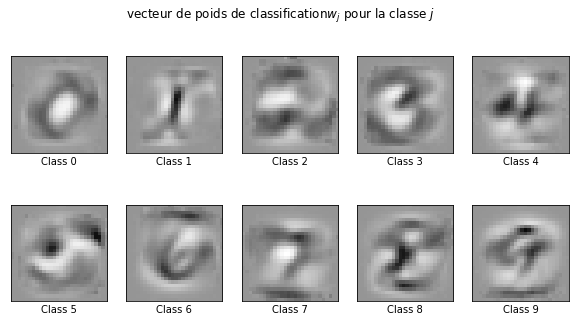

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28),
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('vecteur de poids de classification$w_j$ pour la classe $j$')

plt.show()

### Exercises: ###  
<ul>
<li> Dans l'extrait ci-dessus, nous avons utilisé le solutionneur "sag" qui ne traite que de la régularisation $ \ell_2 $. Essayez un autre solveur, par exemple 'liblinear', dans scikit qui prend en charge la régularisation $ \ell_1 $. Vous pouvez trouver plus de détails sur <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.</a>
<li> Visualisez les échantillons mal classés. Analysez les résultats de la régression logistique sur MNIST et notez-le, car nous étudierons le problème de MNIST ultérieurement à l'aide de réseaux neuronaux profonds.

<li> Essayez de varier la taille de l’entraînement et voyez comment cela affecte les resultats.
<li>  [Théorie] Nous avons considéré une régression logistique à plusieurs classes (MLR) $ K = 10 $, également appelée régression SoftMax. Rappelons que le notre modèle se lit comme suit:
$$
p (y = i | \boldsymbol {x}; W) = \frac {e ^ {\boldsymbol {w} _i ^ T \boldsymbol {x}}} {\sum_ {j = 0} ^ 9 e ^ {\boldsymbol {w} _j ^ T \boldsymbol {x}}}
$$
Utilisez ceci pour construire la fonction de vraisemblance $ P (y | \boldsymbol {x}) $.

<li> [Théorie] Considérons maintenant qu'on nous donne un ensemble de i.i.d. data $ \mathcal {D} = \{(\boldsymbol {x} _1, y_1), \cdots, (\boldsymbol {x}_n, y_n) \} $. Montrze que la maximisation de la vraisemblance (ou, de manière équivalente, par la minimisation de la log-vraisemblance négative), donne la fonction d'erreur correspondante $ \mathbb{E}_{\rm empirique} (\boldsymbol {w} _0, \cdots, \boldsymbol {w} _9) $ que nous avons utilisé pour la regression logiistique. 

<li> [Theory] En utilisant la fonction d'erreur dérivée ci-dessus, calculez son gradient $ \frac {\partial E} {\partial \boldsymbol {w}_k} $. Pouvez-vous trouver une manière élégante d’écrire le gradient?
</ul>
